In [ ]:
import pandas as pd
import numpy as np
import gensim
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = open("/content/drive/MyDrive/word_score.txt", "r")

In [ ]:
dictionary = file.read()

In [ ]:
total = re.compile("[A-Za-z0-9À-ÿ-]+ -?\d+")
wordscore = total.findall(dictionary)

In [ ]:
two_word_phrases = re.compile("[A-Za-zÀ-ÿ-]+ [A-Za-z0-9À-ÿ-]+ -?\d+")
phrasescore = two_word_phrases.findall(dictionary)

In [ ]:
three_word_phrases = re.compile("[A-Za-zÀ-ÿ-]+ [A-Za-zÀ-ÿ-]+ [A-Za-z0-9À-ÿ-]+ -?\d+")
phrasescore_1 = three_word_phrases.findall(dictionary)

In [ ]:
four_word_phrases = re.compile("[A-Za-zÀ-ÿ-]+ [A-Za-zÀ-ÿ-]+ [A-Za-zÀ-ÿ-]+ [A-Za-z0-9À-ÿ-]+ -?\d+")
phrasescore_2 = four_word_phrases.findall(dictionary)

In [ ]:
word_phrase = []
sentiment_scores = []

for i in wordscore:
  word_phrase.append(i[:(i.rfind(' ', 0, len(i)))])
  sentiment_scores.append(i[(i.rfind(' ', 0, len(i))):].strip())

In [ ]:
word_phrase[0:5]

['abandon', 'abandoned', 'abandons', 'abducted', 'abduction']

In [ ]:
for i in phrasescore:
  word_phrase.append(i[:(i.rfind(' ', 0, len(i)))])
  sentiment_scores.append(i[(i.rfind(' ', 0, len(i))):].strip())

In [ ]:
for i in phrasescore_1:
  word_phrase.append(i[:(i.rfind(' ', 0, len(i)))])
  sentiment_scores.append(i[(i.rfind(' ', 0, len(i))):].strip())

In [ ]:
for i in phrasescore_2:
  word_phrase.append(i[:(i.rfind(' ', 0, len(i)))])
  sentiment_scores.append(i[(i.rfind(' ', 0, len(i))):].strip())

In [ ]:
df = pd.DataFrame()

In [ ]:
df['Words and Phrases'] = word_phrase
df['Sentiment Score'] = sentiment_scores

In [ ]:
df.head()

,Words and Phrases,Sentiment Score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [ ]:
imdb = pd.read_csv('/content/drive/MyDrive/IMDb-sample.csv')
imdb.head()

,Index,URL,Text,Sentiment
0,3617,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS
1,3671,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS
2,3157,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS
3,660,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS
4,265,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS


In [ ]:
imdb.Sentiment.value_counts()

POS    1000
NEG    1000
Name: Sentiment, dtype: int64

In [ ]:
raw_review = "++".join(imdb['Text'])

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wc =WordCloud(width = 1000, height = 800)

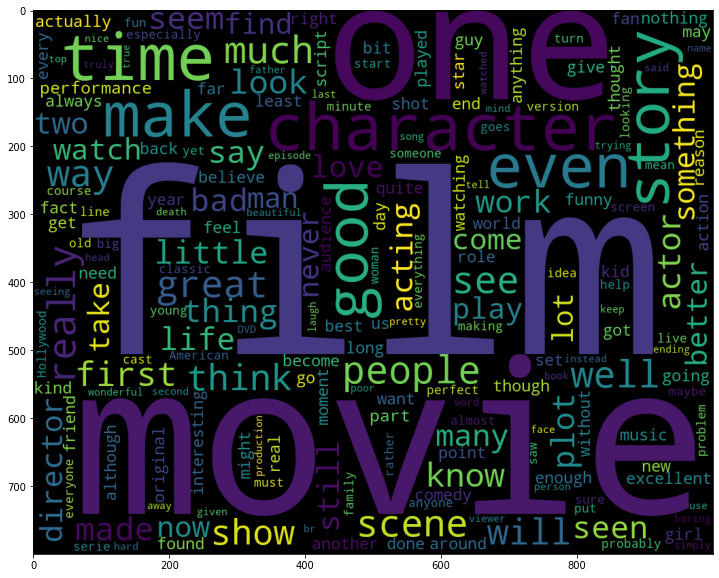

In [ ]:
plt.figure(figsize = (15,10))
plt.imshow(wc.generate_from_text(raw_review))

In [ ]:
for word in ['film', 'movie','one','even', 'given', 'become', 'may', 'actually', 'quite', 'every','seem']:
  STOPWORDS.add(word)

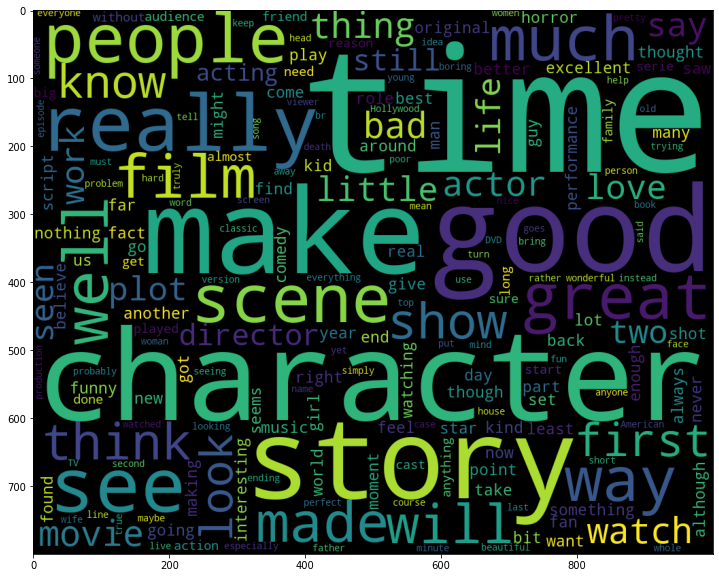

In [ ]:
plt.figure(figsize = (15,10))
plt.imshow(wc.generate_from_text(raw_review))

In [ ]:
texts_raw = imdb['Text']

In [ ]:
def bigram_wordcloud(texts_raw, pattern = "[a-z']+",n_bigrams = 300):
  
  token_pattern = pattern
  tokenizer = nltk.tokenize.RegexpTokenizer(token_pattern)
  texts_in_tokens = []
  for text in texts_raw:
    tokens = tokenizer.tokenize(text.lower())
    tokens_no_stopwords = [w for w in tokens if w not in STOPWORDS] #To get clean text free of stopwords
    texts_in_tokens.append(tokens_no_stopwords)

  bigrams = gensim.models.Phrases(texts_in_tokens, threshold = 5)

  bigram_list = list(bigrams[texts_in_tokens])

  all_bigrams = [w for s in bigram_list for w in s]

  only_bigrams = [w for w in all_bigrams if re.findall("[a-z]+_[a-z]+", w)]

  C = Counter(only_bigrams)

  word_freq = {k:v for k,v in C.most_common(n_bigrams)}

  wc = WordCloud(width = 1000, height = 600)

  plt.figure(figsize = (15, 10))
  plt.imshow(wc.generate_from_frequencies(word_freq))

  return {'stopword_free_text' : texts_in_tokens, 'word_freq' : C}  #dict

In [ ]:
# Testing
text1 = texts_raw[10]
tokenizer = nltk.tokenize.RegexpTokenizer("[a-z']+")
texts_in_tokens = []
tokens = tokenizer.tokenize(text1.lower())
tokens_no_stopwords = [w for w in tokens if w not in STOPWORDS] #without stopwords
print(tokens_no_stopwords)

['big', 'fan', 'romantic', 'comedy', 'genre', 'therefore', 'seen', 'large', 'number', 'films', 'rare', 'strikes', 'totally', 'unique', 'matter', 'equally', 'rare', 'gasping', 'breath', 'laughter', 'several', 'scenes', 'love', 'story', 'little', 'thin', 'ground', 'say', 'probably', 'best', 'romantic', 'comedy', 'emphasis', 'firmly', 'comedy', 'case', 'stretches', 'bounds', 'credibility', 'little', 'rom', "com's", 'four', 'scientists', 'provided', 'funniest', 'moments', 'seen', 'long', 'hesitated', 'briefest', 'moments', 'finally', 'choosing', 'rating', 'believe', 'far', 'many', 'people', 'use', 'indiscriminately', 'therefore', 'maximum', 'rating', 'loses', 'impact', 'big', 'meg', 'ryan', 'fan', 'helps', 'films', 'seen', 'say', 'comprehensively', 'overshadowed', 'tim', 'robbins', 'cast', 'leads', 'play', 'second', 'fiddle', 'antics', 'bumbling', 'intellectuals', 'genuine', 'laugh', 'loud', 'type', 'big', 'fan', 'romantic', 'comedy', 'genre', 'therefore', 'seen', 'large', 'number', 'films

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


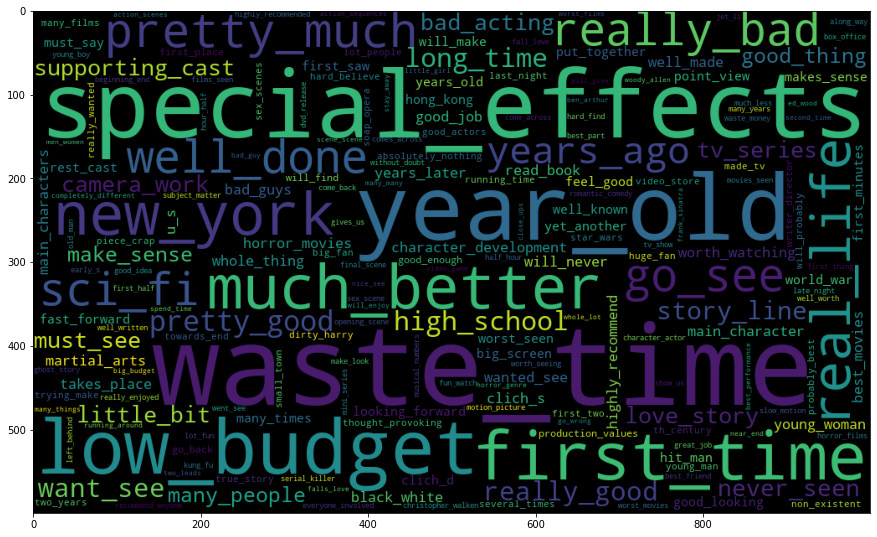

In [ ]:
 mural = bigram_wordcloud(texts_raw)

In [ ]:
from nltk.collocations import *
import nltk
nltk.download('stopwords')
from nltk.text import Text
imdb_nltk_text = nltk.Text(mural['stopword_free_text'][0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
imdb_nltk_text.collocations()

dwelling new; esteem purpose; finds self; follows project; futility
world; high school; new york; project dwelling; school girl; self
esteem; world amateur; york high; girl sense; girlfight follows;
purpose much; sense futility; amateur boxing; boxing finds


In [ ]:
# to find the contexts
imdb_nltk_text.concordance('futility')

Displaying 2 of 2 matches:
                                   futility world amateur boxing finds self es
ng new york high school girl sense futility world amateur boxing finds self es


In [ ]:
imdb_nltk_text.concordance('project')

Displaying 2 of 2 matches:
                                    project dwelling new york high school girl 
will able connect girlfight follows project dwelling new york high school girl 


In [ ]:
imdb_nltk_text.concordance('esteem')

Displaying 2 of 2 matches:
                                    esteem purpose much although boxing boxing
ity world amateur boxing finds self esteem purpose much


In [ ]:
no_stops = [w for s in p['stopword_free_text'] for w in s]

In [ ]:
imdb_all_txt = nltk.Text(no_stops)

In [ ]:
imdb_all_txt

<Text: girlfight follows project dwelling new york high school...>

In [ ]:
imdb_all_txt.collocations(75)

special effects; low budget; waste time; new york; year old; years
ago; martial arts; high school; much better; real life; supporting
cast; hong kong; well done; pretty much; takes place; first time; non
existent; character development; soap opera; fast forward; black
white; blah blah; camera work; highly recommend; dirty harry; star
wars; read book; years later; worth watching; uwe boll; thought
provoking; production values; looking forward; main characters;
christopher walken; las vegas; story line; pretty good; woody allen;
half hour; serial killer; box office; united states; long time; point
view; frank sinatra; laurel hardy; really bad; van damme; make sense;
young woman; video store; want see; clint eastwood; gunga din; good
job; little bit; eddie murphy; kurt russell; rest cast; slow motion;
sudden impact; wanted see; bad guys; brad pitt; musical numbers; piece
crap; put together; bank robbers; close ups; whole thing; san
francisco; must see; recommend anyone; small town


In [ ]:
imdb_all_txt.concordance('killer')

Displaying 25 of 138 matches:
death anoes money plan ruined crazy killer dressed santa suit larry dr giggles
g house found murdered poirot bring killer justice hickory dickory dock solid 
rect rip scene bird crystal plumage killer tries break door outdoes argento's 
ce two leads begin bore fall asleep killer will pop nowhere right back swing t
drills whatnot guess absolute worst killer dentist typical brian yuzna situati
ot shoddy times seems made spot hey killer dentist thought first brilliance co
 insane behavior edison's portrayal killer machine totally reversed normal ido
e sidekick tobin john miles shadowy killer loose love interest tobin shape fem
o confusing huh later tobin chasing killer across back yards suddenly shown go
ke wilson turn stellar performances killer duo fact much films filmed actual l
e object placed wall danvers serial killer incarcerated back s man obsessed re
ty damn good budget plus loved mask killer wore somewhat creepy finale really 
y finale really cool l

In [ ]:
imdb_all_txt.concordance('russell')

Displaying 22 of 22 matches:
o heaven always liked although kurt russell probably closest person look elvis 
 obvious people elvis although kurt russell probably closest person look elvis 
conceit somehow works newcomer lucy russell succeeds making sympathetic charact
tempting make dinner wives williams russell lot fun bad overlooked top notch co
mes might trip easily public's lips russell cousy byrd magic mchale oscar wilt 
nica watch fine turns joyce compton russell hicks walter long balance must hand
unique story famous actress theresa russell hard nights work goes hotel visit f
sors papers testify hearing theresa russell excellent trying exactly impersonat
ans think times course famous scene russell demonstrates emil understand theory
w professor delighted demonstration russell roeg married real life admirable wo
s classic well written tragedy kurt russell elvis plain simple dedication role 
 greatest star shelley winters bing russell kurt's real dad excellent elvis' pa
 col tom pa

In [ ]:
imdb_all_txt.concordance('recommend') #to see overall review recommending watching or not

Displaying 25 of 147 matches:
or fine choice gem whole heartedly recommend sure will make screen chose watch 
action version punisher end highly recommend comic buff super hero fan anyone o
a impossible hey hurt dream anyway recommend seen find dvd episodes characters 
ght forward anime open mind highly recommend short long enough cat soup wild tr
hole thing great deal fun heartily recommend thank imdbman letting paying custo
ersed normal idol image definitely recommend looking stylish action packed must
realise preparing take rabbit mars recommend episode anyone likes bugs bunny ma
 subtitles keep absorbing strongly recommend dvd versions ability turn subtitle
batably another great parody still recommend great horror parody done seems col
ne seems college filmmakers highly recommend anybody able make fun night living
ving dead still respect filmmakers recommend anybody loves d movies horror paro
ot moved stop thinking days highly recommend watched first time piedras persona
scenes inc

In [ ]:
imdb_all_txt.concordance('crime')

Displaying 25 of 77 matches:
ackson 's style gangster uses powers crime figure protect children jackson allo
redits imdb noticed entry named upon crime something rang bell clicked reading 
redits imdb noticed entry named upon crime spent hours drenched nothing seen co
quents dealt scheme committed second crime becomes merely pretext following tee
ankfully preachiness earlier dearden crime dramas 'the blue lamp' apparent inst
daptation austen's novel neat little crime drama packs lot minute running time 
ist mary patricia wright helps solve crime terrific shoot finale takes place st
ction point wonder catch neat little crime drama packs lot minute running time 
t cryptically directionless polished crime drama maintained two leads bizarre i
t duvall apostle punished particular crime hope leniency based temporary insani
ubject rape emotional mental effects crime upon victims although much cast's ac
t much films filmed actual locations crime took place inside house add addition
g brilliant

In [ ]:
imdb_all_txt.concordance('brad')

Displaying 18 of 18 matches:
hink brilliantly cast extremely sexy brad pitt mean attractive story beautiful
back reaction great never much cared brad pitt though turns monkeys fight club
s s strongest aspects s performances brad pitt startlingly great trailer trash
ind actors awesome must give mention brad pitt hilarious mental patient james 
t paz vega co star gets career boost brad silberling gets name draw people wat
aired fair skinned actors val kilmer brad pitt etc excellent choice enjoyed mi
supporting cast excellent especially brad pitt stealing scenes showing great f
therefore really 'his' film' justice brad pitt's portrayal goines curiously en
 enjoyed bruce willis madeline stowe brad pitt small appearance christover plu
 think four best bruce willis movies brad pitt's best brad pitt delivers perfe
bruce willis movies brad pitt's best brad pitt delivers perfect performance po
e james cole convincing bruce willis brad pitt acted extraordinarily well bril
its throughout checking

In [ ]:
imdb_all_txt.concordance('vegas')

Displaying 17 of 17 matches:
se ttss krook played comedian johnny vegas version toby played bernard hepton v
er showcases talents beauty diva las vegas thrilled taped able view whenever wa
er showcases talents beauty diva las vegas bill paxton aliens near dark termina
n wrote directed look modern day las vegas gap generations first directorial ef
makes hip comments young people look vegas give another ten years disapproval d
n wrote directed look modern day las vegas gap generations first directorial ef
othing value makes mother former las vegas chorus girl incapable surviving alth
e long guess old nevada town outside vegas money heist circus circus hotel las 
 money heist circus circus hotel las vegas stevens leads girl gang three find m
r anticipated despite neat looks las vegas 's average yet credible acting invol
ing involved plot line potential las vegas lady lays big boring egg seems forev
e long guess old nevada town outside vegas money heist circus circus hotel las 
 money heis

In [ ]:
imdb_all_txt.concordance('murphy')

Displaying 22 of 22 matches:
ome two young children mary patrick murphy played real life brother sister duo
 juvenile delinquency elder brother murphy family johnny leader gang rock roll
 hotel meets jackson ripner cillian murphy batman beyond airport gets know lit
ays sympathize role demands cillian murphy hand naturally creepy looking trail
entless madman nevertheless cillian murphy true identity established played ro
her incredibly talented performance murphy look creepier minute craven craft c
ng urich lucci cassidy mccarthy pre murphy brown joe regalbuto soleil moon fry
ng urich lucci cassidy mccarthy pre murphy brown joe regalbuto soleil moon fry
c dressed father christmas br eddie murphy will surprise golden child especial
en find nine stars viva nepal eddie murphy will surprise br finally audience k
 crudely good hero never much eddie murphy fan find irritating portrayal winne
ight scenes climactic confrontation murphy modern man suddenly dropped orienta
uch watching last night

In [ ]:
imdb_all_txt.common_contexts(words = ['hero'])

super_fan times_neutral vonnegut_lack welcomes_release action_sci
fi_stereotype unsung_many favorite_s romantic_early intense_people
stalwart_acting underworld_estranged deke_survive film's_writer
dashing_beautiful navy_carl competition_stolen limits_principally
unassuming_gripped super_maureen


In [ ]:
imdb_all_txt.common_contexts(words = ['science'])

principles_dangers new_military leads_fiction action_fiction
political_professor la_des old_great monkeys'_fiction pentagon_team
perfect_teacher fans_fiction futuristic_fiction horror_fiction
junk_will mystery_theater social_giving tract_inferior
believable_fiction back_lab mystery_theatre


In [ ]:
imdb_all_txt.similar('action')

story horror much reality acting character time death certain graphic
interesting people 's gun better final sex second gore care


## LSA


In [ ]:
imdb.head()

,Index,URL,Text,Sentiment
0,3617,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS
1,3671,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS
2,3157,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS
3,660,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS
4,265,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS


In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer, CountVectorizer
from wordcloud import STOPWORDS

In [ ]:
tfidf = TfidfVectorizer(token_pattern = "[A-Za-z0-9']+", max_df =0.6, min_df = 5, stop_words = STOPWORDS)

In [ ]:
tfidf.fit(imdb['Text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.6, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'actually', 'after', 'again',
                            'against', 'all', 'also', 'am', 'an', 'and', 'any',
                            'are', "aren't", 'as', 'at', 'be', 'because',
                            'become', 'been', 'before', 'being', 'below',
                            'between', 'both', 'but', 'by', 'can', "can't", ...},
                strip_accents=None, sublinear_tf=False,
                token_pattern="[A-Za-z0-9']+", tokenizer=None, use_idf=True,
                vocabulary=None)

In [ ]:
matrix_tf = tfidf.transform(imdb['Text'])
matrix_tf

<2000x6179 sparse matrix of type '<class 'numpy.float64'>'
	with 164613 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

In [ ]:
min(matrix_tf.shape)

2000

In [ ]:
tsvd = TruncatedSVD(n_components = 150) #For top 150 vectors of U matrix

In [ ]:
U_mat = tsvd.fit_transform(matrix_tf)
U_mat.shape

(2000, 150)

In [ ]:
Qs = "What was the outcome of the war?"

In [ ]:
matrix_tf_Q = tfidf.transform([Qs])
matrix_tf_Q

<1x6179 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [ ]:
u_mat_Q = tsvd.transform(matrix_tf_Q)
u_mat_Q.shape

(1, 150)

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
cosine_dist = pairwise_distances(metric='cosine', X=U_mat, Y = u_mat_Q)

In [ ]:
len(cosine_dist)

2000

In [ ]:
sorted(cosine_dist)[:10]

[array([0.20309017]),
 array([0.21680273]),
 array([0.25121833]),
 array([0.29789222]),
 array([0.37911886]),
 array([0.38449523]),
 array([0.388348]),
 array([0.39540737]),
 array([0.41661291]),
 array([0.43353359])]

In [ ]:
#Looking for minimum distances
np.argmin(cosine_dist)

343

In [ ]:
imdb['Text'].iloc[1000]

"A total waste of time Just throw in a few explosions, non stop fighting, exotic cars a deranged millionaire, slow motion computer generated car crashes and last but not least a Hugh Hefner like character with wall to wall hot babes, and mix in a blender and you will have this sorry excuse for a movie. I really got a laugh out of the Dr. Evil like heavily fortified compound. The plot was somewhere between preposterous and non existent. How many millionaires are willing to make a 25 million dollar bet on a car race? Answer: 4 but, didn't they become millionaires through fiscal responsibility? This was written for pubescent males, it plays like a video game. I did enjoy the Gulfstream II landing in the desert though.A total waste of time Just throw in a few explosions, non stop fighting, exotic cars a deranged millionaire, slow motion computer generated car crashes and last but not least a Hugh Hefner like character with wall to wall hot babes, and mix in a blender and you will have this

# Word Query context


In [ ]:
imdb.tail()

,Index,URL,Text,Sentiment
1995,1499,http://www.imdb.com/title/tt0318040/usercomments,Tourists head to Ireland for a school trip to ...,NEG
1996,3721,http://www.imdb.com/title/tt0070795/usercomments,Two films are useful for scaring people to God...,NEG
1997,8983,http://www.imdb.com/title/tt0261311/usercomments,Ulises is a literature teacher that arrives to...,NEG
1998,8222,http://www.imdb.com/title/tt0888019/usercomments,"Um... Okay, I guess I get the whole shaky-cam,...",NEG
1999,7013,http://www.imdb.com/title/tt0120577/usercomments,"Unfortunately this film, 54 was a pathetic att...",NEG


In [ ]:
len(tfidf.vocabulary_)

6179

In [ ]:
def find_K_similar_words(query, tfidf_model, tfidf_DTM_mat, K=5, svd_comp = 100):
  
  vocab = tfidf.vocabulary_
  query_word_index = vocab[query]
  tsvd_words = TruncatedSVD(n_components=svd_comp)
  V_mat = tsvd_words.fit_transform(tfidf_DTM_mat.T)
  query_vec = V_mat[query_word_index,:]
  similarity_scores = pairwise_distances(X=V_mat, Y=query_vec.reshape(1,-1), metric='cosine')
  print(similarity_scores[:K+1])
  required_indices = np.argsort(similarity_scores.flatten())
  print(required_indices[:K+1])
  id2word_dict = {v:k for k,v in vocab.items()}
  K_similar_words = []
  for key in required_indices[1:K+1]:
    K_similar_words.append(id2word_dict[key])
  return K_similar_words

In [ ]:
find_K_similar_words('wayne',tfidf, matrix_tf, K = 10)

[[0.84017924]
 [0.80828732]
 [0.80100408]
 [0.9423602 ]
 [0.9367589 ]
 [0.91971237]
 [0.79648226]
 [1.12896132]
 [0.94244972]
 [0.8289129 ]
 [0.85653656]]
[5988 2873 4617 1506 3498 2693 4616 3127 1415 5647  604]


['insists',
 'rid',
 'dennis',
 'michael',
 'hopper',
 'rick',
 'lara',
 'dangerous',
 'toy',
 'belt']

In [ ]:
find_K_similar_words('action',tfidf, matrix_tf, K =10)

[[0.81725789]
 [0.9731237 ]
 [0.86740969]
 [0.74749928]
 [0.98906057]
 [0.99080896]
 [0.89769234]
 [1.0086794 ]
 [0.9803544 ]
 [0.9227949 ]
 [0.87454663]]
[ 175 5305 5434 2957 5304 4871  817 3922 2138 1405  580]


['stunts',
 'tad',
 'jackie',
 'stunt',
 'sequences',
 'butt',
 'packed',
 'fighting',
 'damon',
 'beers']

In [ ]:
df.tail()

,Words and Phrases,Sentiment Score
3408,not working,-3
3409,right direction,3
3410,screwed up,-3
3411,some kind,0
3412,does not work,-3


In [ ]:
word_dict = df.copy(deep = True)

In [ ]:
word_dict.set_index('Words and Phrases',inplace = True)

In [ ]:
imdb.tail()

,Index,URL,Text,Sentiment
1995,1499,http://www.imdb.com/title/tt0318040/usercomments,Tourists head to Ireland for a school trip to ...,NEG
1996,3721,http://www.imdb.com/title/tt0070795/usercomments,Two films are useful for scaring people to God...,NEG
1997,8983,http://www.imdb.com/title/tt0261311/usercomments,Ulises is a literature teacher that arrives to...,NEG
1998,8222,http://www.imdb.com/title/tt0888019/usercomments,"Um... Okay, I guess I get the whole shaky-cam,...",NEG
1999,7013,http://www.imdb.com/title/tt0120577/usercomments,"Unfortunately this film, 54 was a pathetic att...",NEG


In [ ]:
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
imdb['Tokenized_reviews'] = imdb.apply(lambda rows : nltk.word_tokenize(rows['Text']),axis = 1)

In [ ]:
imdb.tail()

,Index,URL,Text,Sentiment,Tokenized_reviews
1995,1499,http://www.imdb.com/title/tt0318040/usercomments,Tourists head to Ireland for a school trip to ...,NEG,"[Tourists, head, to, Ireland, for, a, school, ..."
1996,3721,http://www.imdb.com/title/tt0070795/usercomments,Two films are useful for scaring people to God...,NEG,"[Two, films, are, useful, for, scaring, people..."
1997,8983,http://www.imdb.com/title/tt0261311/usercomments,Ulises is a literature teacher that arrives to...,NEG,"[Ulises, is, a, literature, teacher, that, arr..."
1998,8222,http://www.imdb.com/title/tt0888019/usercomments,"Um... Okay, I guess I get the whole shaky-cam,...",NEG,"[Um, ..., Okay, ,, I, guess, I, get, the, whol..."
1999,7013,http://www.imdb.com/title/tt0120577/usercomments,"Unfortunately this film, 54 was a pathetic att...",NEG,"[Unfortunately, this, film, ,, 54, was, a, pat..."


In [ ]:
word_dict

,Sentiment Score
Words and Phrases,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
not working,-3
right direction,3
screwed up,-3


In [ ]:
def collect_common_words(review):

  d =[]
  for word in review:
    if word in list(word_dict.index):
      d.append(word)
  return d

In [ ]:
imdb['Review_dict_common_words'] = imdb['Tokenized_reviews'].apply(collect_common_words)

In [ ]:
imdb.tail()

,Index,URL,Text,Sentiment,Tokenized_reviews,Review_dict_common_words
1995,1499,http://www.imdb.com/title/tt0318040/usercomments,Tourists head to Ireland for a school trip to ...,NEG,"[Tourists, head, to, Ireland, for, a, school, ...","[horrific, of, up, in, bad, of, fun, of, good,..."
1996,3721,http://www.imdb.com/title/tt0070795/usercomments,Two films are useful for scaring people to God...,NEG,"[Two, films, are, useful, for, scaring, people...","[useful, significant, poignant, bad, in, failu..."
1997,8983,http://www.imdb.com/title/tt0261311/usercomments,Ulises is a literature teacher that arrives to...,NEG,"[Ulises, is, a, literature, teacher, that, arr...","[in, love, beautiful, in, romance, in, tragic,..."
1998,8222,http://www.imdb.com/title/tt0888019/usercomments,"Um... Okay, I guess I get the whole shaky-cam,...",NEG,"[Um, ..., Okay, ,, I, guess, I, get, the, whol...","[better, mess, bad, bad, horrific, of, garbage..."
1999,7013,http://www.imdb.com/title/tt0120577/usercomments,"Unfortunately this film, 54 was a pathetic att...",NEG,"[Unfortunately, this, film, ,, 54, was, a, pat...","[pathetic, of, true, of, good, joy, bad, good,..."


In [ ]:
int(word_dict[word_dict.index == 'abandon']['Sentiment Score'].values[0])

-2

In [ ]:
def get_sent(reviews):
  d = []
  for words in reviews:
    if words in list(word_dict.index):
      dict_sc = int(word_dict[word_dict.index == words]['Sentiment Score'].values[0])

      d.append(dict_sc)
  return d

In [ ]:
imdb['Sentiment_Score_for_Review'] = imdb['Review_dict_common_words'].apply(get_sent)

In [ ]:
imdb.tail()

,Index,URL,Text,Sentiment,Tokenized_reviews,Review_dict_common_words,Sentiment_Score_for_Review
1995,1499,http://www.imdb.com/title/tt0318040/usercomments,Tourists head to Ireland for a school trip to ...,NEG,"[Tourists, head, to, Ireland, for, a, school, ...","[horrific, of, up, in, bad, of, fun, of, good,...","[-3, 0, -3, -2, -3, 0, 4, 0, 4, 0, -3, -3, -2,..."
1996,3721,http://www.imdb.com/title/tt0070795/usercomments,Two films are useful for scaring people to God...,NEG,"[Two, films, are, useful, for, scaring, people...","[useful, significant, poignant, bad, in, failu...","[2, 1, 2, -3, -2, -2, 0, -2, -2, 2, -2, 0, 2]"
1997,8983,http://www.imdb.com/title/tt0261311/usercomments,Ulises is a literature teacher that arrives to...,NEG,"[Ulises, is, a, literature, teacher, that, arr...","[in, love, beautiful, in, romance, in, tragic,...","[-2, 4, 3, -2, 2, -2, -2, -2, 0, -2, 3, 0, 1, ..."
1998,8222,http://www.imdb.com/title/tt0888019/usercomments,"Um... Okay, I guess I get the whole shaky-cam,...",NEG,"[Um, ..., Okay, ,, I, guess, I, get, the, whol...","[better, mess, bad, bad, horrific, of, garbage...","[2, -2, -3, -3, -3, 0, -1, -2, 0, -2, 1, -3, -..."
1999,7013,http://www.imdb.com/title/tt0120577/usercomments,"Unfortunately this film, 54 was a pathetic att...",NEG,"[Unfortunately, this, film, ,, 54, was, a, pat...","[pathetic, of, true, of, good, joy, bad, good,...","[-2, 0, 2, 0, 4, 3, -3, 4, 0, 2, -3, 4, -2, 0,..."


In [ ]:
def sentiment_calc(Sentiment_Score_for_Review):

  if len(Sentiment_Score_for_Review)>0:
    total = (sum(Sentiment_Score_for_Review)/len(Sentiment_Score_for_Review))
    return total
  else:
    return 0

In [ ]:
imdb['Sentiment_Score'] = imdb['Sentiment_Score_for_Review'].apply(sentiment_calc)

In [ ]:
imdb.head()

,Index,URL,Text,Sentiment,Tokenized_reviews,Review_dict_common_words,Sentiment_Score_for_Review,Sentiment_Score
0,3617,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS,"[Girlfight, follows, a, project, dwelling, New...","[of, of, esteem, good, shoot, of, no, no, of, ...","[0, 0, 2, 4, -1, 0, -1, -1, 0, 0, 2]",0.454545
1,3671,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS,"[Hollywood, North, is, an, euphemism, from, th...","[of, in, like, in, in, of, successful, novel, ...","[0, -2, -2, -2, -2, 0, 3, 2, 4, 2, -2, -2, 2, ...",-0.280000
2,3157,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS,"[That, '70s, Show, is, definitely, the, funnie...","[great, like, favorites, awesome, hope, hilari...","[4, -2, 2, 4, 2, 2, 0, -5, 1, 4, 4, 2, 4, 4, 2...",1.520000
3,660,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS,"[9/10-, 30, minutes, of, pure, holiday, terror...","[of, pure, terror, scary, of, careful, in, gre...","[0, 1, -3, -2, 0, 2, -2, -2, -2, -3, -2, -2, -...",-1.190476
4,265,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS,"[A, series, of, random, ,, seemingly, insignif...","[of, insignificant, no, of, great, matter, sin...","[0, -2, -1, 0, 4, 1, -2, 0, -2, -3, 2, -2, 2, ...",0.000000


In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.metrics import classification_report, mean_squared_error

In [ ]:
tfidf = TfidfVectorizer(max_features = 500)
X = imdb['Text']
y1 = imdb['Sentiment']  #Sentiment prediction
y2 = imdb['Sentiment_Score']  #score prediction

X = tfidf.fit_transform(X)

In [ ]:
X1_train,X1_test,y1_train, y1_test = train_test_split(X,y1, test_size = 0.2, random_state =123)
X2_train,X2_test,y2_train, y2_test = train_test_split(X,y2, test_size = 0.2, random_state =321)

In [ ]:
clf1 = GradientBoostingClassifier()
clf2 = LGBMClassifier()
reg1 = GradientBoostingRegressor()
reg2 = LGBMRegressor()

In [ ]:
clf1.fit(X1_train,y1_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
clf2.fit(X1_train,y1_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
reg1.fit(X2_train, y2_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
reg2.fit(X2_train, y2_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Prediction Report

In [ ]:
#Regression
y2_reg1_pred = reg1.predict(X2_test)

In [ ]:
print(mean_squared_error(y2_reg1_pred,y2_test))

0.27766787667568765


In [ ]:
y2_reg2_pred = reg2.predict(X2_test)

In [ ]:
print(mean_squared_error(y2_reg2_pred,y2_test))

0.24641839843423632


In [ ]:
max(y2_reg1_pred)

1.509165457943357

In [ ]:
max(y2_reg2_pred)

1.674334334630757

In [ ]:
#classification
y1_clf1_pred = clf1.predict(X1_test)

In [ ]:
print(classification_report(y1_test,y1_clf1_pred))

              precision    recall  f1-score   support

         NEG       0.92      0.75      0.82       193
         POS       0.80      0.94      0.86       207

    accuracy                           0.84       400
   macro avg       0.86      0.84      0.84       400
weighted avg       0.86      0.84      0.84       400



In [ ]:
y1_clf2_pred = clf2.predict(X1_test)

In [ ]:
print(classification_report(y1_test,y1_clf2_pred))

              precision    recall  f1-score   support

         NEG       0.91      0.80      0.85       193
         POS       0.83      0.93      0.88       207

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400

